In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [134]:
data = pd.read_csv('../data/raw/tayaratn_data.csv')

In [ ]:
data.drop(columns=['type'], inplace=True)
data.columns

Index(['title', 'price', 'transaction_type', 'surface', 'bathrooms', 'rooms',
       'options', 'description', 'location', 'date_posted', 'image_url',
       'agency', 'url', 'scrape_date'],
      dtype='object')

In [137]:
profile = ProfileReport(data, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 18.51it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [138]:
# Renommage des colonnes
newCols = {
    'surface': 'size',
    'bathrooms': 'bathroom_count',
    'rooms': 'room_count',
    'transaction_type': 'type',
    'date_posted': 'date'
}
data.rename(columns=newCols, inplace=True)

# Data Cleaning

In [139]:
data.loc[data['type'] != "À Louer", 'type'] = "À Vendre"

In [140]:
def getByCategory(data, category):
    if 'category' in data.columns:
        rows = data.category.isin(category)
    else:
        rows = data.title.str.contains('|'.join(category), case=False, na=False)
    return (data[rows], rows)

def printInfo(data):
    print(data.info())
    print(data.describe())
    print(data.head())

In [141]:
# Création d'une colonne category basée sur l'URL
data['category'] = data['url'].apply(lambda x: x.split('/')[4] if isinstance(x, str) else 'Autre')

In [142]:
# Mapping des catégories
category_mapping = {
    'appartements': 'Appartements',
    'locations-de-vacances': 'Locations de vacances',
    'colocations': 'Colocations',
    'maisons-et-villas': 'Maisons et Villas',
    'terrains-et-fermes': 'Terrains et Fermes',
    'magasins-commerces-et-locaux-industriels': 'Magasins, Commerces et Locaux industriels',
    'bureaux-et-plateaux': 'Bureaux et Plateaux'
}

data['category'] = data['category'].map(category_mapping).fillna('Autre Immobilier')

In [143]:
data['category'].value_counts()

category
Appartements             4044
Maisons et Villas        1980
Terrains et Fermes       1592
Autre Immobilier          968
Bureaux et Plateaux       897
Locations de vacances     195
Colocations                41
Name: count, dtype: int64

In [144]:
# Nettoyage par catégorie : Appartements
rows, cats = getByCategory(data, ['Appartements', 'Locations de vacances', 'Colocations'])

printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Index: 4280 entries, 0 to 9508
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4280 non-null   object 
 1   price           3904 non-null   float64
 2   type            4280 non-null   object 
 3   size            3969 non-null   float64
 4   bathroom_count  3977 non-null   float64
 5   room_count      4126 non-null   float64
 6   options         4280 non-null   object 
 7   description     4277 non-null   object 
 8   location        4280 non-null   object 
 9   date            3219 non-null   object 
 10  image_url       4280 non-null   object 
 11  agency          2521 non-null   object 
 12  url             4280 non-null   object 
 13  scrape_date     4280 non-null   object 
 14  category        4280 non-null   object 
dtypes: float64(4), object(11)
memory usage: 535.0+ KB
None
              price          size  bathroom_count    room_count
count  3.

In [145]:
rooms = data.room_count.between(1,20)
bathrooms = data.bathroom_count.between(1,15)
size = data['size'].between(70,2000)

In [146]:
dropped = data[(cats & ~(rooms & bathrooms & size))]
data.drop(dropped.index,inplace=True)
data.reset_index(drop=True, inplace=True)

In [147]:
# Nettoyage par catégorie : Maisons et Villas

rows, cat = getByCategory(data, ['Maisons et Villas'])

printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Index: 1980 entries, 26 to 8113
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1980 non-null   object 
 1   price           1665 non-null   float64
 2   type            1980 non-null   object 
 3   size            1856 non-null   float64
 4   bathroom_count  1801 non-null   float64
 5   room_count      1868 non-null   float64
 6   options         1980 non-null   object 
 7   description     1973 non-null   object 
 8   location        1980 non-null   object 
 9   date            1525 non-null   object 
 10  image_url       1980 non-null   object 
 11  agency          1069 non-null   object 
 12  url             1980 non-null   object 
 13  scrape_date     1980 non-null   object 
 14  category        1980 non-null   object 
dtypes: float64(4), object(11)
memory usage: 247.5+ KB
None
              price          size  bathroom_count   room_count
count  1.

In [148]:
rooms = data.room_count.between(1, 20)
bathrooms = data.bathroom_count.between(1, 15)
size = data['size'].between(70, 2000)

In [149]:
dropped = data[(cat & ~(rooms & bathrooms & size))]
data.drop(dropped.index,inplace=True)
data.reset_index(drop=True, inplace=True)

In [150]:
# Nettoyage par catégorie : Terrains et Fermes

rows, cat = getByCategory(data, ['Terrains et Fermes'])

printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Index: 1592 entries, 2 to 7673
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1592 non-null   object 
 1   price           1302 non-null   float64
 2   type            1592 non-null   object 
 3   size            0 non-null      float64
 4   bathroom_count  0 non-null      float64
 5   room_count      0 non-null      float64
 6   options         1592 non-null   object 
 7   description     1591 non-null   object 
 8   location        1592 non-null   object 
 9   date            1236 non-null   object 
 10  image_url       1592 non-null   object 
 11  agency          722 non-null    object 
 12  url             1592 non-null   object 
 13  scrape_date     1592 non-null   object 
 14  category        1592 non-null   object 
dtypes: float64(4), object(11)
memory usage: 199.0+ KB
None
              price  size  bathroom_count  room_count
count  1.302000e+03

In [152]:
import re
import pandas as pd
import numpy as np

def clean_number(text):
    if not text:
        return None
    
    text = text.replace('\xa0', '').replace(' ', '').replace('\u202f', '')
    text = text.replace(',', '.')
    text = ''.join(c for c in text if c.isdigit() or c == '.')
    
    try:
        return float(text)
    except (ValueError, AttributeError):
        return None


def extract_land_size(row):
    text = str(row['title']) + ' ' + str(row['description'])
    text = text.lower()
    
    # Priorité 1: Surface titre
    patterns_official = [
        r'terrain\s+de\s+([\d\s\xa0,.]+)\s*m[²2]',      # "terrain de 625 m²"
        r'sur\s+titre.*?([\d\s\xa0,.]+)\s*m[²2]',       # "sur titre... 625 m²"
        r'([\d\s\xa0,.]+)\s*m[²2]\s+sur\s+titre',       # "625 m² sur titre"
    ]
    
    for pattern in patterns_official:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            size = clean_number(match.group(1))
            if size and size >= 50:  # Minimum raisonnable pour un terrain
                return size, 'titre'
    
    # Priorité 2: Surface réelle explicite
    pattern = r'surface\s+réelle.*?([\d\s\xa0,.]+)\s*m[²2]'
    match = re.search(pattern, text, re.IGNORECASE)
    if match:
        size = clean_number(match.group(1))
        if size and size >= 50:
            return size, 'réelle'
    
    # Priorité 3: Toutes les surfaces mentionnées (prendre la plus grande > 50m²)
    all_matches = re.findall(r'([\d\s\xa0,.]+)\s*m[²2]', text, re.IGNORECASE)
    valid_sizes = []
    
    for match in all_matches:
        size = clean_number(match)
        if size and 50 <= size <= 1_000_000:  # Entre 50m² et 100 hectares
            valid_sizes.append(size)
    
    if valid_sizes:
        # Prendre la plus grande surface
        largest = max(valid_sizes)
        return largest, 'inférée'
    
    # Priorité 4: Hectares
    match = re.search(r'([\d\s\xa0,.]+)\s*hectares?', text, re.IGNORECASE)
    if match:
        size = clean_number(match.group(1))
        if size:
            return size * 10000, 'hectares'
    
    return np.nan, 'manquant'


# Appliquer
land_mask = data['category'] == 'Terrains et Fermes'
extraction_results = data[land_mask].apply(extract_land_size, axis=1, result_type='expand')
extraction_results.columns = ['size', 'source']

data.loc[land_mask, 'size'] = extraction_results['size']

# Statistiques
print(f"Surfaces extraites: {data.loc[land_mask, 'size'].notna().sum()} / {land_mask.sum()}")
print(f"\nSources:")
print(extraction_results['source'].value_counts())

Surfaces extraites: 1042 / 1592

Sources:
source
inférée     772
manquant    550
titre       238
hectares     32
Name: count, dtype: int64


Les terrains représentent 20.7% du dataset initial (1,592 propriétés). Une tentative d'extraction automatique de la surface depuis les descriptions textuelles a été effectuée.

**Décision :** Compte tenu du taux d'extraction insuffisant (<70%) et de la prédominance de surfaces inférées (peu fiables), nous avons choisi d'exclure les terrains du dataset d'entraînement. 

In [153]:
data = data[data['category'] != 'Terrains et Fermes']
data.reset_index(drop=True, inplace=True)

In [154]:
# Nettoyage par catégorie : Bureaux et Locaux

rows, cats = getByCategory(data, ['Magasins, Commerces et Locaux industriels', 'Bureaux et Plateaux'])

printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Index: 897 entries, 3 to 6082
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           897 non-null    object 
 1   price           840 non-null    float64
 2   type            897 non-null    object 
 3   size            876 non-null    float64
 4   bathroom_count  764 non-null    float64
 5   room_count      758 non-null    float64
 6   options         897 non-null    object 
 7   description     896 non-null    object 
 8   location        897 non-null    object 
 9   date            706 non-null    object 
 10  image_url       897 non-null    object 
 11  agency          738 non-null    object 
 12  url             897 non-null    object 
 13  scrape_date     897 non-null    object 
 14  category        897 non-null    object 
dtypes: float64(4), object(11)
memory usage: 112.1+ KB
None
              price          size  bathroom_count  room_count
count  8.400

In [ ]:
# Définir les plages valides
rooms = data.room_count.between(1, 15)
bathrooms = data.bathroom_count.between(0, 10)
size = data['size'].between(20, 2000)

In [ ]:
# Garder uniquement les lignes valides
dropped = data[(cats & ~(rooms & bathrooms & size))]
data.drop(dropped.index,inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
# Nettoyage par catégorie : Autre Immobilier
rows, cat = getByCategory(data, ['Autre Immobilier'])

printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Index: 968 entries, 22 to 6001
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           968 non-null    object 
 1   price           793 non-null    float64
 2   type            968 non-null    object 
 3   size            733 non-null    float64
 4   bathroom_count  581 non-null    float64
 5   room_count      574 non-null    float64
 6   options         968 non-null    object 
 7   description     959 non-null    object 
 8   location        968 non-null    object 
 9   date            767 non-null    object 
 10  image_url       968 non-null    object 
 11  agency          482 non-null    object 
 12  url             968 non-null    object 
 13  scrape_date     968 non-null    object 
 14  category        968 non-null    object 
dtypes: float64(4), object(11)
memory usage: 121.0+ KB
None
              price          size  bathroom_count  room_count
count  7.93

In [157]:
data.drop(rows.index,inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
data.location.unique()

In [ ]:
data['location'] = data['location'].str.lower()
data['location'] = data['location'].str.replace('-', ' ')
data['location'] = data['location'].str.strip()

data['location'].unique()

In [158]:
# Nettoyage des prix

data.dropna(subset=['price'],inplace=True)
data.reset_index(drop=True, inplace=True)

In [159]:
dropped = data.price < 10
data.drop(data[dropped].index,inplace=True)
data.reset_index(drop=True, inplace=True)

In [160]:
forSale = data['type'] == 'À Vendre'
below10k = data['price'] < 10000
data.loc[forSale & below10k, 'price'] *= 1000

In [163]:
data.drop(columns=['date'],inplace=True)
data.drop(columns=['scrape_date'],inplace=True)
data.drop(columns=['options'],inplace=True)
data.drop(columns=['description'],inplace=True)
data.drop(columns=['url'],inplace=True)
data.drop(columns=['image_url'],inplace=True)
data.drop(columns=['agency'],inplace=True)
data.drop(columns=['title'],inplace=True)

In [164]:
data.columns

Index(['price', 'type', 'size', 'bathroom_count', 'room_count', 'location',
       'category'],
      dtype='object')

In [165]:
data.drop_duplicates(keep='first', inplace=True)
data.reset_index(drop=True, inplace=True)

In [166]:
data['log_price'] = np.log10(data['price'])

In [167]:
data.to_csv("../data/clean/cleaned_data.csv", index=False)

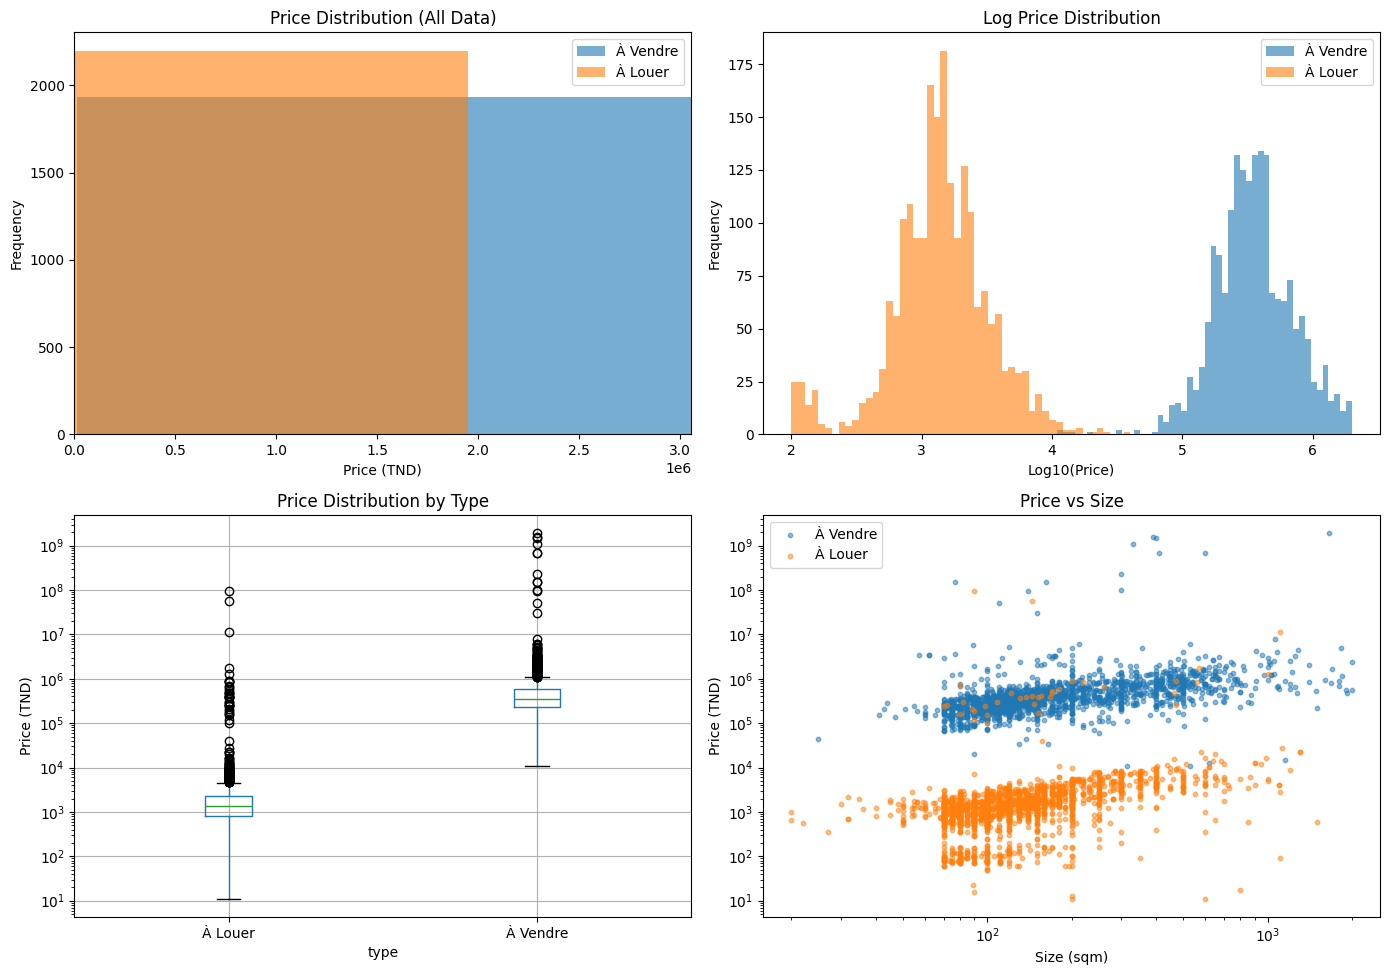

In [ ]:
extreme_outliers = data.nlargest(10, 'price')[['price', 'type', 'category', 'location', 
                                               'room_count', 'bathroom_count', 'size']]

# Visualization of price distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Overall price distribution
for prop_type in data['type'].unique():
    subset = data[data['type'] == prop_type]['price']
    axes[0, 0].hist(subset, bins=50, alpha=0.6, label=prop_type)
axes[0, 0].set_xlabel('Price (TND)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Price Distribution (All Data)')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, data['price'].quantile(0.99))

# 2. Log price distribution
for prop_type in data['type'].unique():
    subset = data[data['type'] == prop_type]['log_price']
    axes[0, 1].hist(subset, bins=50, alpha=0.6, label=prop_type)
axes[0, 1].set_xlabel('Log10(Price)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Log Price Distribution')
axes[0, 1].legend()

# 3. Box plot by type
data.boxplot(column='price', by='type', ax=axes[1, 0])
axes[1, 0].set_ylabel('Price (TND)')
axes[1, 0].set_title('Price Distribution by Type')
axes[1, 0].set_yscale('log')
axes[1, 0].get_figure().suptitle('')

# 4. Price vs Size scatter
for prop_type in data['type'].unique():
    subset = data[data['type'] == prop_type]
    axes[1, 1].scatter(subset['size'], subset['price'], alpha=0.5, label=prop_type, s=10)
axes[1, 1].set_xlabel('Size (sqm)')
axes[1, 1].set_ylabel('Price (TND)')
axes[1, 1].set_title('Price vs Size')
axes[1, 1].set_yscale('log')
axes[1, 1].set_xscale('log')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [176]:
vendre_min, vendre_max = 10_000, 2_000_000
louer_min, louer_max = 100, 50_000

data_filtered = data.copy()
vendre_mask = (data_filtered['type'] == 'À Vendre') & \
              (data_filtered['price'] >= vendre_min) & \
              (data_filtered['price'] <= vendre_max)
louer_mask = (data_filtered['type'] == 'À Louer') & \
             (data_filtered['price'] >= louer_min) & \
             (data_filtered['price'] <= louer_max)

data_filtered = data_filtered[vendre_mask | louer_mask]

### Feature Engineering

In [ ]:
# Features de base
data['room_bathroom_ratio'] = data['room_count'] / np.maximum(data['bathroom_count'], 1)
data['total_rooms'] = data['room_count'] + data['bathroom_count']
data['size_per_room'] = data['size'] / np.maximum(data['room_count'], 1)
data['bathroom_density'] = data['bathroom_count'] / np.maximum(data['size'], 1)
data['size_x_rooms'] = data['size'] * data['room_count']
data['size_x_bathrooms'] = data['size'] * data['bathroom_count']

high_value_locations = ['tunis', 'ariana', 'ben arous', 'la manouba']
upscale_locations = ['nabeul', 'sousse', 'monastir', 'mahdia', 'bizerte']

data['is_premium_location'] = data['location'].str.lower().isin(high_value_locations).astype(int)
data['is_upscale_location'] = data['location'].str.lower().isin(upscale_locations).astype(int)

data['luxury_score'] = (
    (data['size'] / 100) * 0.3 +           
    (data['room_count'] / 5) * 0.2 +       
    (data['bathroom_count'] / 2) * 0.2 +   
    data['is_premium_location'] * 0.3 + 
    data['is_upscale_location'] * 0.15
)

data['property_tier'] = pd.cut(data['luxury_score'], 
                              bins=3, 
                              labels=['standard', 'upscale', 'luxury'])


engineered_cols = ['room_bathroom_ratio', 'total_rooms', 'size_per_room', 
                   'bathroom_density', 'size_x_rooms', 'size_x_bathrooms',
                   'luxury_score', 'is_premium_location', 'is_upscale_location']
for col in engineered_cols:
    if data[col].dtype in ['float64', 'int64']:
        data[col] = data[col].replace([np.inf, -np.inf], np.nan).fillna(data[col].median())

print("  Features créées: luxury_score, property_tier, is_premium_location, is_upscale_location")
categorical_cols = ['category', 'type', 'location', 'property_tier']

Préparer pour cross-validation avec calcul du prix médian par zone

* Note: Le prix médian sera calculé sur le train set uniquement dans la CV

In [ ]:
# Fonction pour ajouter les statistiques de location
def add_location_features(df_train, df_test, df_full):
    # Calculer sur train uniquement
    location_stats = df_train.groupby('location').agg({
        'price': ['median', 'mean', 'std', 'count']
    })
    location_stats.columns = ['location_price_median', 'location_price_mean', 
                              'location_price_std', 'location_count']
    location_stats = location_stats.reset_index()
    
    # Normaliser les stats de prix (pour éviter le leakage direct)
    location_stats['location_price_level'] = (
        location_stats['location_price_median'] / location_stats['location_price_median'].median()
    )
    
    # Merger sur train et test
    df_train_merged = df_train.merge(location_stats[['location', 'location_price_level']], 
                                     on='location', how='left')
    df_test_merged = df_test.merge(location_stats[['location', 'location_price_level']], 
                                   on='location', how='left')
    
    # Remplir les valeurs manquantes (nouvelles locations) avec la médiane
    global_median = location_stats['location_price_level'].median()
    df_train_merged['location_price_level'] = df_train_merged['location_price_level'].fillna(global_median)
    df_test_merged['location_price_level'] = df_test_merged['location_price_level'].fillna(global_median)
    
    return df_train_merged, df_test_merged, location_stats

In [ ]:
joblib.dump(high_value_locations, '../output/premium_locations.pkl')
joblib.dump(upscale_locations, '../output/upscale_locations.pkl')

In [ ]:
data_filtered.to_csv('../data/clean/cleaned_data_filtered.csv', index=False)